## Naive Bayes 

In [1]:
# featurelerin birbirinden bağımsız ve birbirinden etkilenmediğinden yola çıkar
#olasılıklar koşulludur. Biri olmadan diğerine bakılmaz.

"""
1- Multinomial NB: Çoğunlukla döküman sınıflandırma problemi için kullanılır.
2- Bernoulli NB:   Bool değişkenler için daha fazla kullanılır.(yes/no)
3- Gaussian NB:    normal dagılımlı sürekli degerler

"""

'\n1- Multinomial NB: Çoğunlukla döküman sınıflandırma problemi için kullanılır.\n2- Bernoulli NB:   Bool değişkenler için daha fazla kullanılır.(yes/no)\n3- Gaussian NB:    normal dagılımlı sürekli degerler\n\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data=pd.DataFrame(data)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [9]:
y_pred=classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


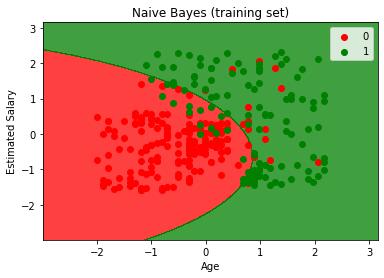

In [10]:
from matplotlib.colors import ListedColormap   #error check et
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


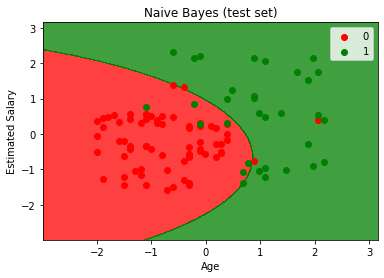

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Decision Tree

In [18]:
# ilk nereden bölecegimiz en büyük problem

In [13]:
"""
Kök dügüm belirleme yöntemleri--
1- Entropy:(0 ile 1 arasında cıkar)
2- Information gain(bilgi kazancı):
3- Gini Impurity: Entropye benzer ama daha iyi.(max 0.5)
"""

'\nKök dügüm belirleme yöntemleri--\n1- Entropy:(0 ile 1 arasında cıkar)\n2- Information gain(bilgi kazancı):\n3- Gini Impurity: Entropye benzer ama daha iyi.(max 0.5)\n'

In [14]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [15]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini", random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[62  6]
 [ 4 28]]


In [21]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
from sklearn import tree

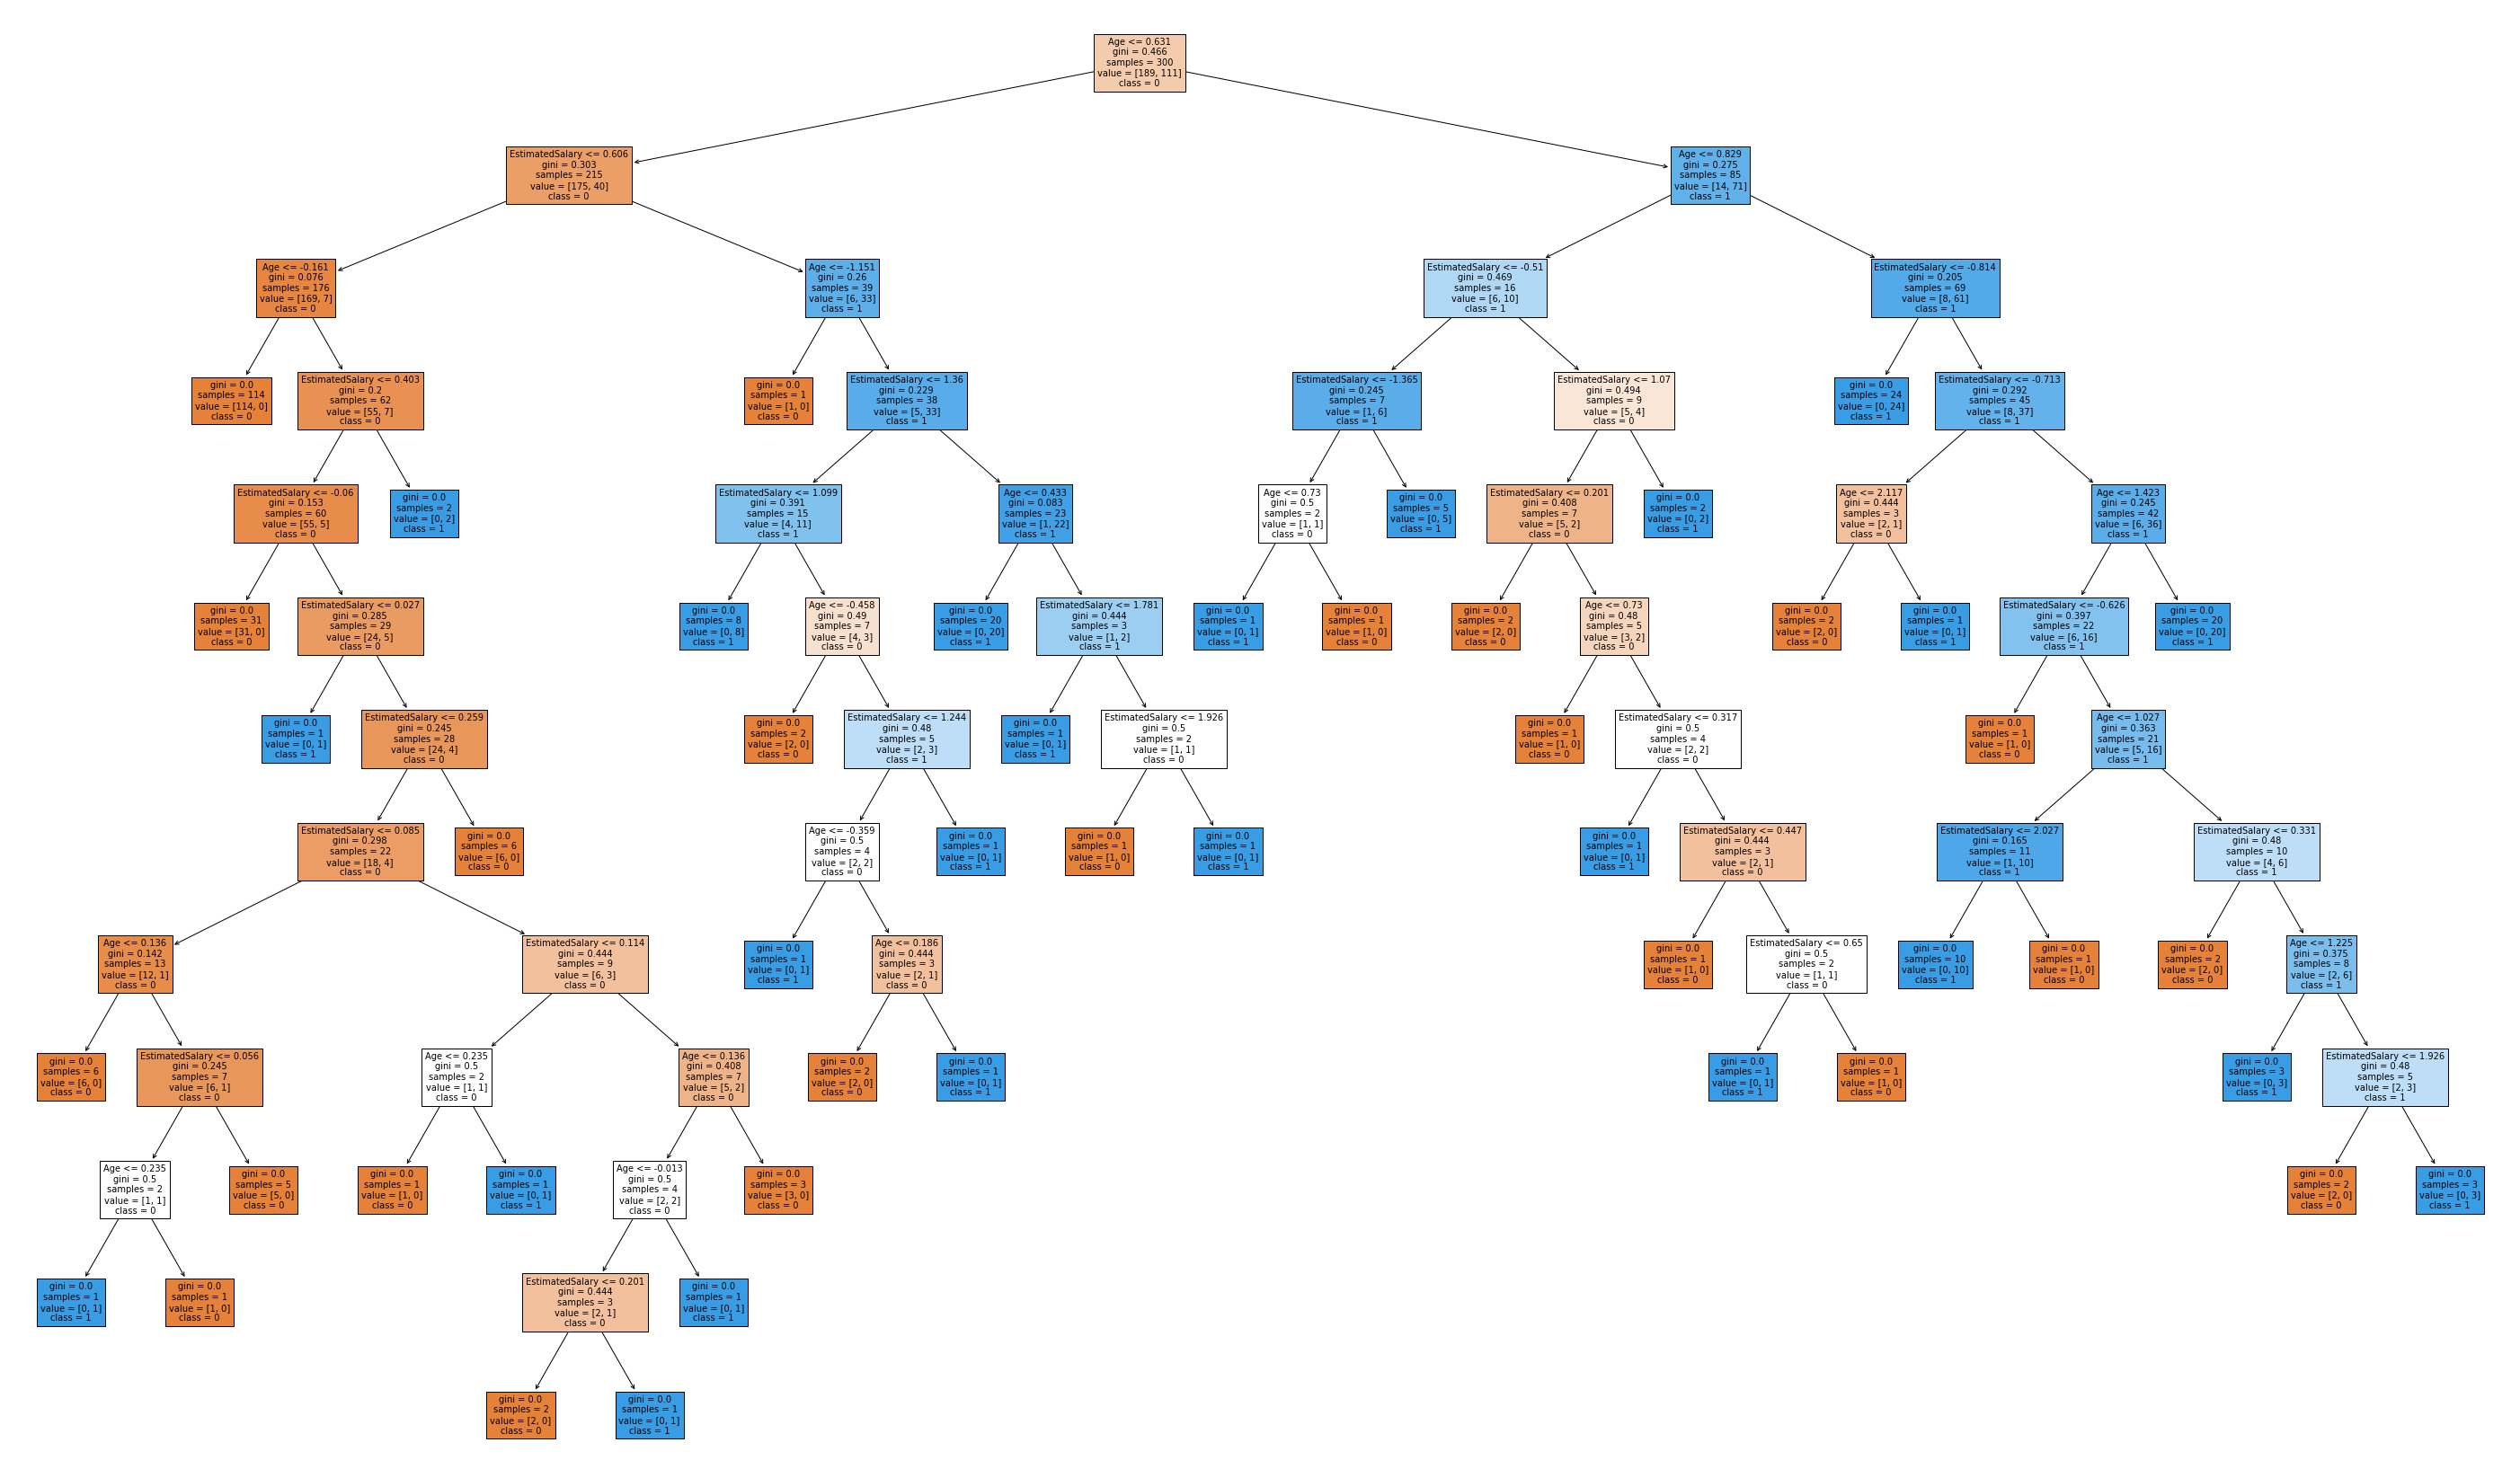

In [23]:


fn=["Age","EstimatedSalary"]  #error
cn=["0","1"]
fig,axes=plt.subplots(nrows=1 ,ncols=1, figsize=(50,30))
tree.plot_tree(classifier, feature_names=fn, class_names=cn, filled=True)
fig.savefig("AIUP.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


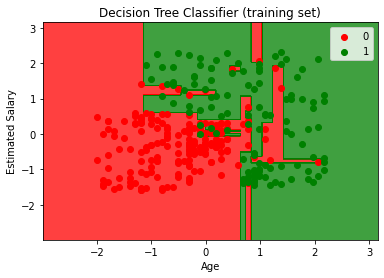

In [24]:
from matplotlib.colors import ListedColormap   #error check et
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


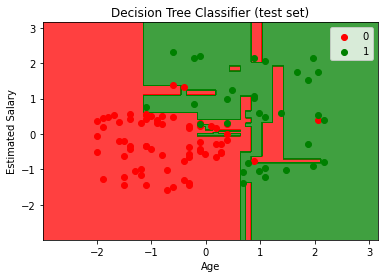

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [27]:
col_names=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
pima=pd.read_csv("pima-indians-diabetes.csv",header=None, names=col_names)


In [28]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [30]:
X=pima.iloc[:,[0,1,2,3,4,5,6,7]].values
y=pima.iloc[:,-1].values

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [32]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred=clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result= confusion_matrix(y_test,y_pred)
print("Confussion matrix:")
print(result)

result1=classification_report(y_test,y_pred)
print("Classification report")
print(result1)


result2= accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confussion matrix:
[[117  29]
 [ 38  47]]
Classification report
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       146
           1       0.62      0.55      0.58        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.71       231

Accuracy: 0.70995670995671


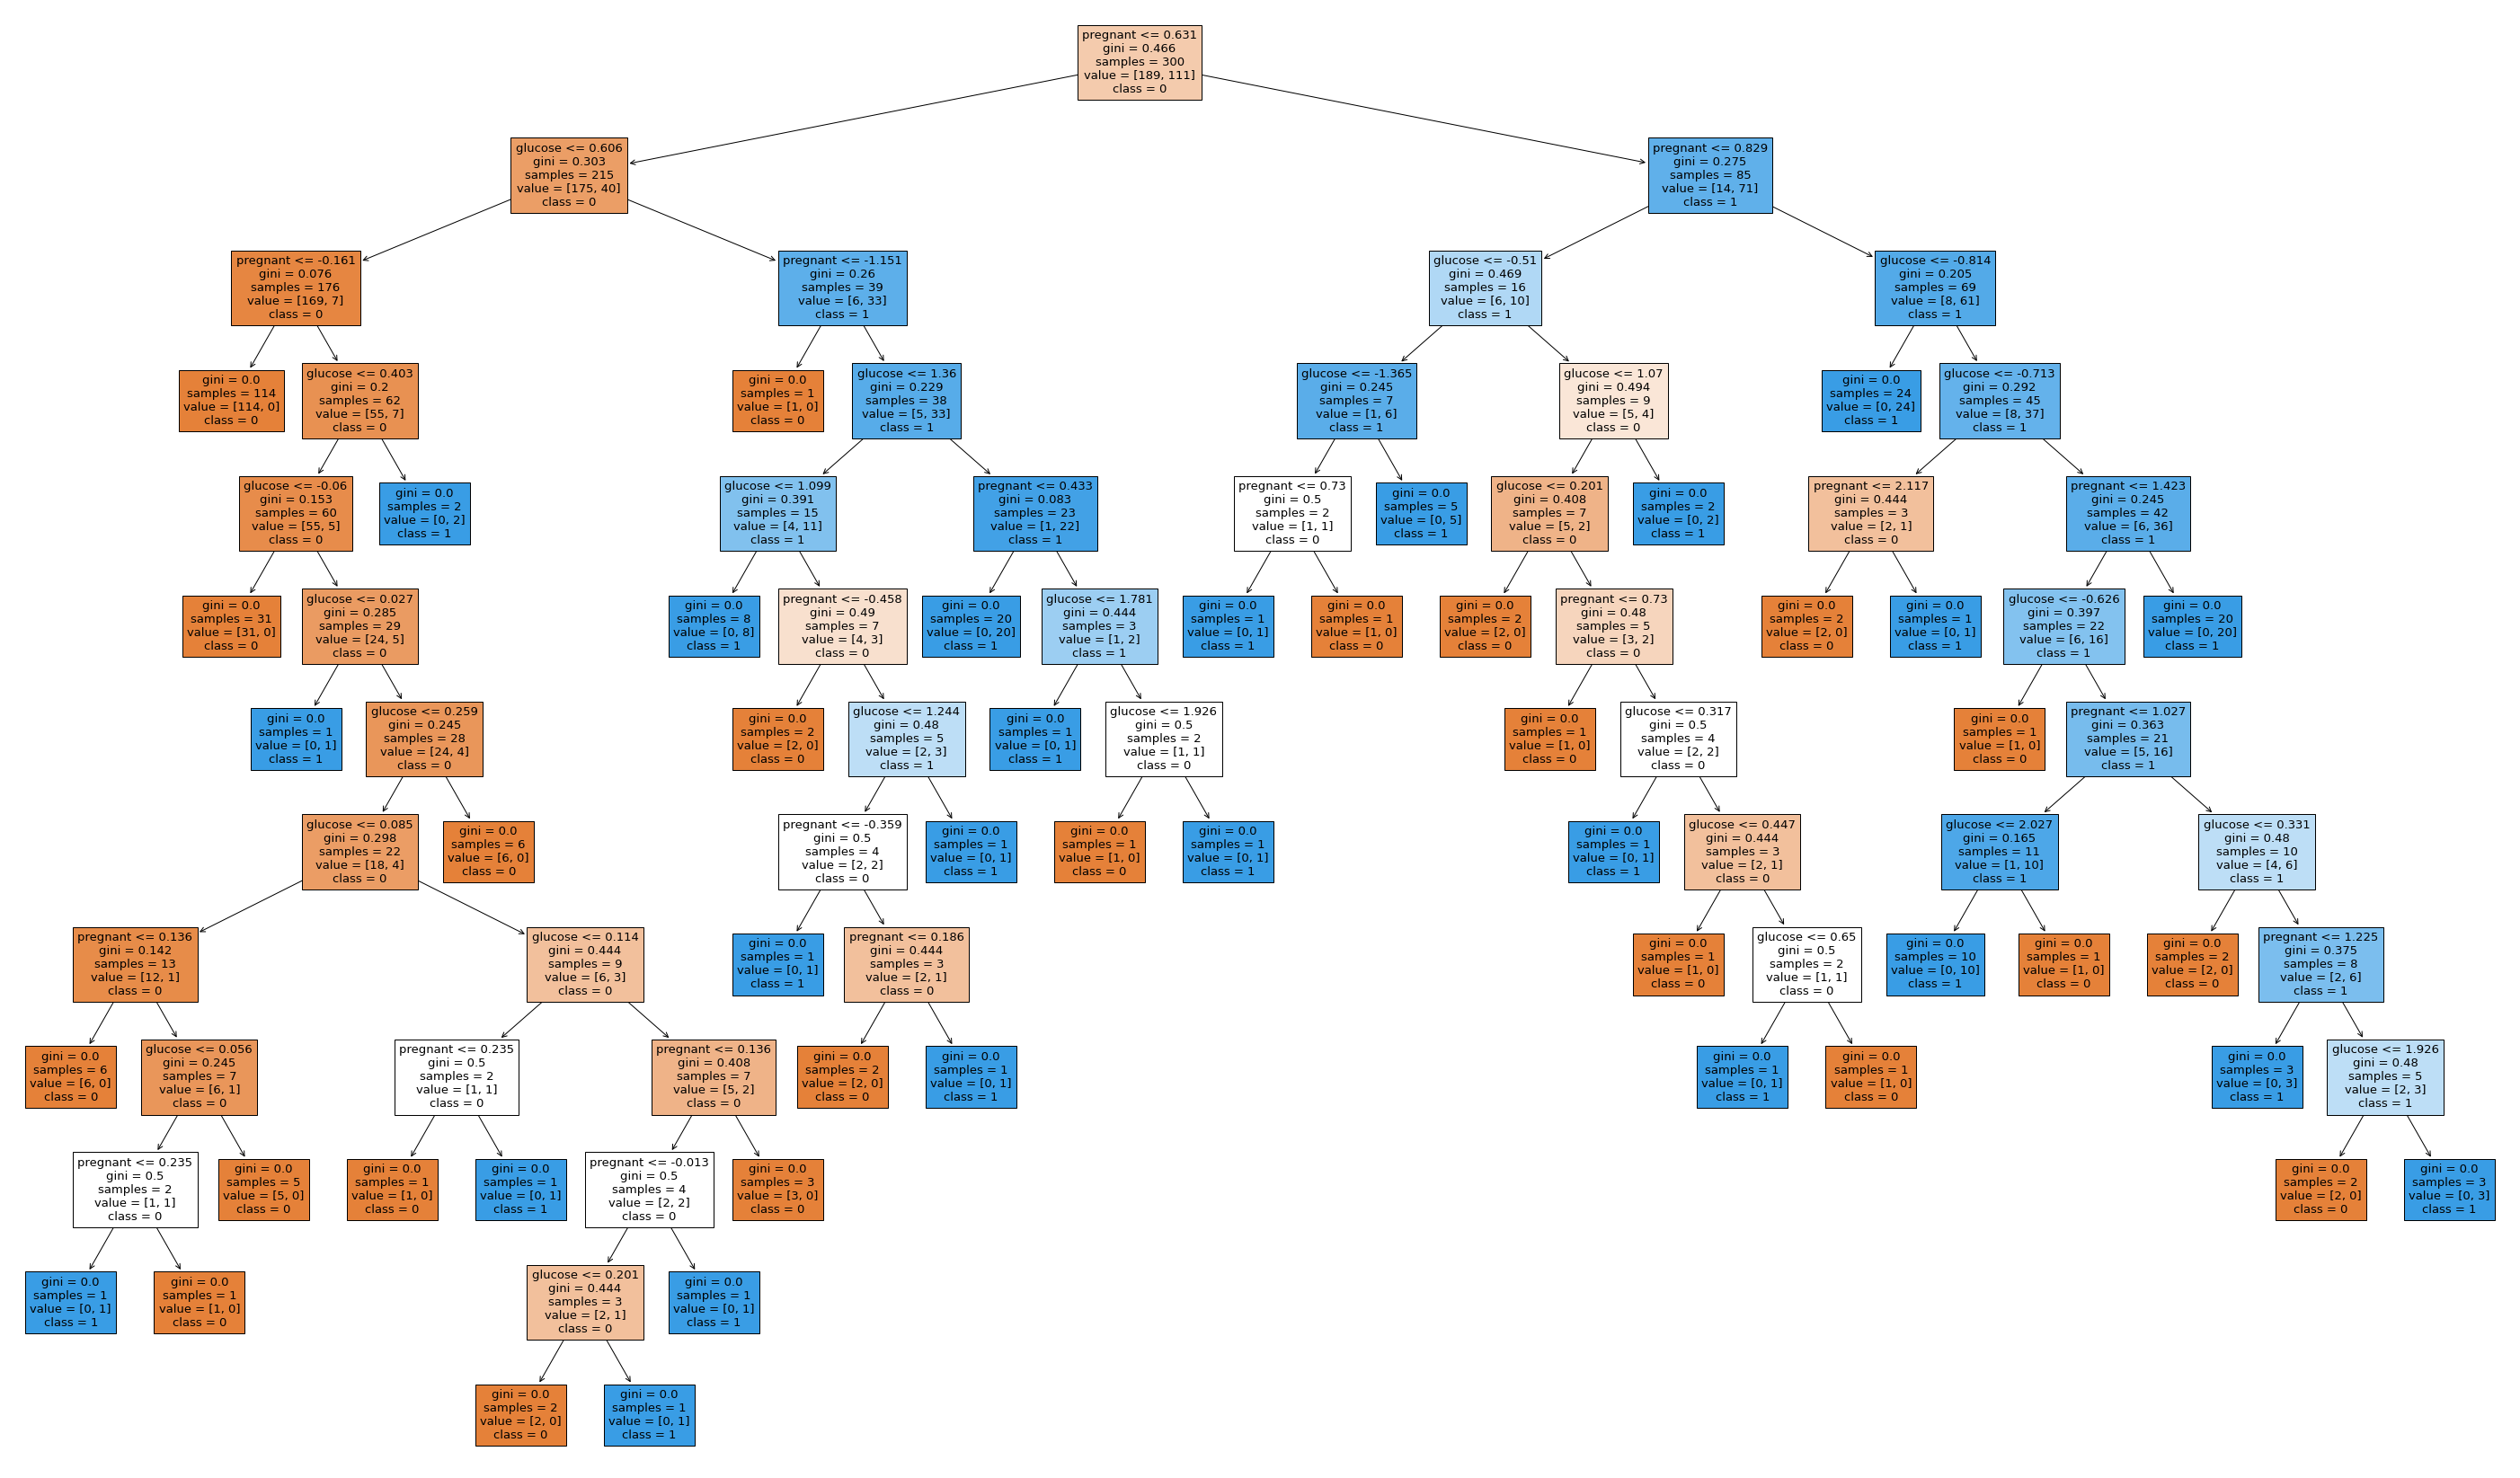

In [35]:
fn=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]  
cn=["0","1"]
fig ,axes=plt.subplots(nrows=1 ,ncols=1, figsize=(50,30))
tree.plot_tree(classifier, feature_names=fn, class_names=cn, filled=True)
fig.savefig("AIUPornek2.png")

## Danışmansız ögrenme(Clustering)

In [36]:
"""
1- Centroid tabanlı kümeleme: K-means
2- Hierachical kümeleme: a- Agglomerative( Asagidan yukarı)
                         b- Divisive( yukarıdan asagi)
                         
3- Densitiy Models(Yogunluk Modelleri):  Ex-DBSCAN, OPTICS


"""

'\n1- Centroid tabanlı kümeleme: K-means\n2- Hierachical kümeleme: a- Agglomerative( Asagidan yukarı)\n                         b- Divisive( yukarıdan asagi)\n                         \n3- Densitiy Models(Yogunluk Modelleri):  Ex-DBSCAN, OPTICS\n\n\n'

In [37]:
# sahte haber tespiti, spam e-posta filtreleme, satış pazarlama, network trafigini sınıflandırma, suc aktivitelerini belirleme
#deprem calısmaları

In [38]:
"""
1- random olarak k merkez atar
2- her noktanın k merkeze olan uzaklıgı hesaplanır ve ilgili kümeye atamaları yapar
3- her nokta 1 kümeye atandıktan sonra, centroid merkezleri yeniden hesaplanır.
4- 2 ve 3. madde herhangi bir nokta yer degistirmeyene kadar devam eder.

"""

'\n1- random olarak k merkez atar\n2- her noktanın k merkeze olan uzaklıgı hesaplanır ve ilgili kümeye atamaları yapar\n3- her nokta 1 kümeye atandıktan sonra, centroid merkezleri yeniden hesaplanır.\n4- 2 ve 3. madde herhangi bir nokta yer degistirmeyene kadar devam eder.\n\n'

In [39]:
# ELBOW METHOD